In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

c:\Users\kelly\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 126ms/step - accuracy: 0.9107 - loss: 0.2956 - val_accuracy: 0.9809 - val_loss: 0.0583
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 148ms/step - accuracy: 0.9719 - loss: 0.0931 - val_accuracy: 0.9859 - val_loss: 0.0431
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9802 - loss: 0.0672 - val_accuracy: 0.9878 - val_loss: 0.0350
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9830 - loss: 0.0552 - val_accuracy: 0.9896 - val_loss: 0.0304
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9858 - loss: 0.0489 - val_accuracy: 0.9900 - val_loss: 0.0280
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 103ms/step - accuracy: 0.9874 - loss: 0.0408 - val_accuracy: 0.9911 - val_loss: 0.0262
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.9893 - loss: 0.0359 - val_accuracy: 0.9926 - val_loss: 0.0230
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.9903 - loss: 0.03

In [9]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9925 - loss: 0.0232
Test Accuracy: 0.9925


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


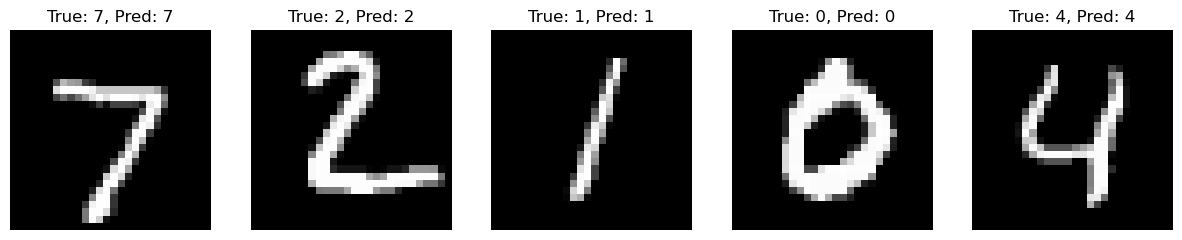

In [10]:
# Visualize predictions
def visualize_predictions(model, x_test, y_test, num_samples=5):
    predictions = model.predict(x_test[:num_samples])
    predicted_labels = np.argmax(predictions, axis=1)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"True: {y_test[i]}, Pred: {predicted_labels[i]}")
        axes[i].axis('off')
    plt.show()

visualize_predictions(model, x_test, y_test)

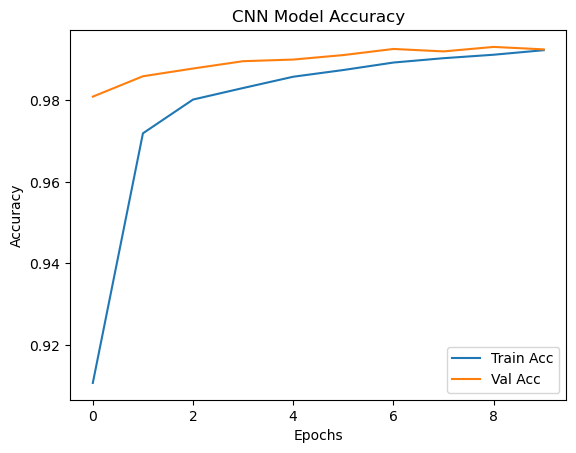

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


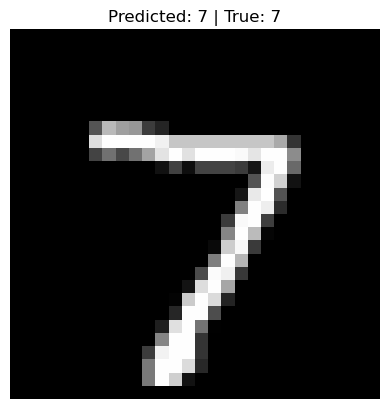

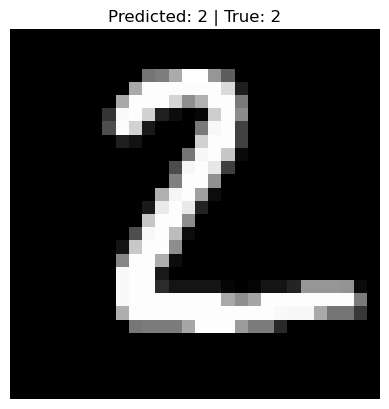

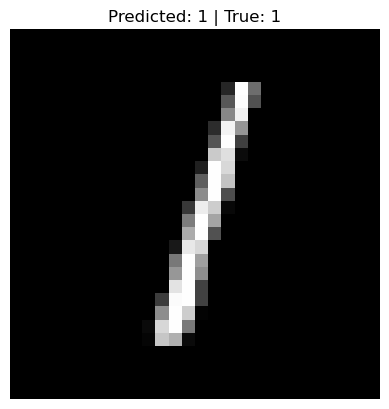

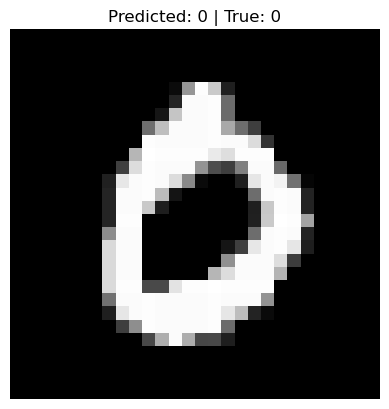

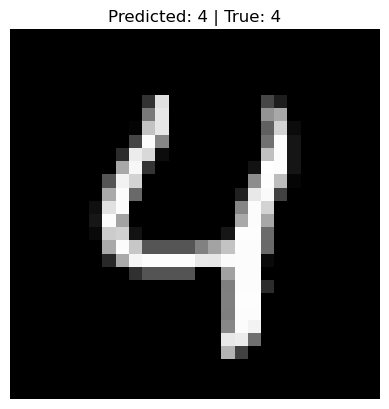

In [11]:
# Plot training results
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("CNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predict sample images
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()} | True: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [12]:
model.save('mnist_model.h5')
